### Utilize the observation similar to above to implement an efficient version of a k × k median filter. Generate a plot figure similar to previous question.

In [1]:
%matplotlib inline

import cv2
import numpy as np
from matplotlib import pyplot as plt
import math
import time

In [2]:
i1 = './A2_resources/inp1.png'

img1 = cv2.imread(i1, 0)

In [3]:
def im2col(A, block, stepsize=1):
    m,n = A.shape
    s0, s1 = A.strides    
    nrows = m-block[0]+1
    ncols = n-block[1]+1
    shp = block[0],block[1],nrows,ncols
    strd = s0,s1,s0,s1

    out_view = np.lib.stride_tricks.as_strided(A, shape=shp, strides=strd)
    return out_view.reshape(block[0]*block[1],-1)[:,::stepsize]

In [4]:
def median_filter_eff(img, k):
    a1, a2 = img.shape

    imcol = im2col(img, (a1-k+1,a2-k+1))
    y = np.median(imcol, axis = 1)
    y = y.reshape(a1-k+1, a2-k+1)
    
    return y

In [5]:
def median_filter(img, k):
    output = np.zeros_like(img)
    m = math.floor(float(k)/2)

    image_padded = np.zeros((img.shape[0] + 2*m, img.shape[1] + 2*m))   
    image_padded[m:-m, m:-m] = img

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            val = np.median(image_padded[i:i+k,j:j+k])
            output[i,j] = val
            
    
    return output

In [8]:
k = [3,5,7,9,11,13,15,17,19,21,23,25,27,29,31]
arr_median = []
arr_eff_median = []

for k_val in k:
    s1 = time.time()
    img2 = median_filter(img1, k_val)
    e1 = time.time()
    t1 = e1 - s1
    arr_median.append(t1)

    s2 = time.time()
    img3 = median_filter_eff(img1, k_val)
    e2 = time.time()
    t2 = e2 - s2
    arr_eff_median.append(t2)

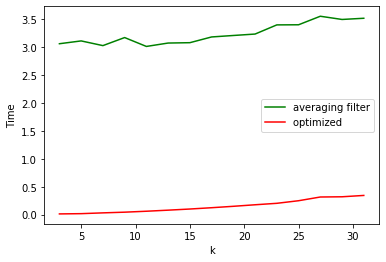

In [9]:
plt.plot(k, arr_median, 'g', label='averaging filter')
plt.plot(k, arr_eff_median, 'r', label='optimized ')
plt.xlabel("k")
plt.ylabel("Time")
plt.legend()
plt.show()